In [41]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9028d7a4143ba4309ca193ca03def48c


In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [4]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

607

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | san carlos del zulia
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | norman wells
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | volot
Processing Record 12 of Set 1 | moose factory
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | sagaing
Processing Record 16 of Set 1 | sur
Processing Record 17 of Set 1 | felidhoo
City not found. Skipping...
Processing Record 18 of Set 1 | sioux lookout
Processing Record 19 of Set 1 | aljezur
Processing Record 20 of Set 1 | ilo
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | tuktoyaktuk
Processing Recor

Processing Record 36 of Set 4 | shingu
Processing Record 37 of Set 4 | upernavik
Processing Record 38 of Set 4 | esperance
Processing Record 39 of Set 4 | salinas
Processing Record 40 of Set 4 | golden
Processing Record 41 of Set 4 | vila franca do campo
Processing Record 42 of Set 4 | torbay
Processing Record 43 of Set 4 | ask
Processing Record 44 of Set 4 | gotsu
Processing Record 45 of Set 4 | lompoc
Processing Record 46 of Set 4 | klaksvik
Processing Record 47 of Set 4 | yanan
City not found. Skipping...
Processing Record 48 of Set 4 | pemberton
Processing Record 49 of Set 4 | vardo
Processing Record 50 of Set 4 | talnakh
Processing Record 1 of Set 5 | beringovskiy
Processing Record 2 of Set 5 | bambous virieux
Processing Record 3 of Set 5 | port shepstone
Processing Record 4 of Set 5 | castro
Processing Record 5 of Set 5 | taltal
Processing Record 6 of Set 5 | waslala
Processing Record 7 of Set 5 | batticaloa
Processing Record 8 of Set 5 | yafran
Processing Record 9 of Set 5 | hal

Processing Record 25 of Set 8 | haines junction
Processing Record 26 of Set 8 | bure
Processing Record 27 of Set 8 | hailar
Processing Record 28 of Set 8 | ponta do sol
Processing Record 29 of Set 8 | verkhnevilyuysk
Processing Record 30 of Set 8 | alotau
City not found. Skipping...
Processing Record 31 of Set 8 | seoni
Processing Record 32 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 33 of Set 8 | mucurapo
Processing Record 34 of Set 8 | cherskiy
Processing Record 35 of Set 8 | broken hill
Processing Record 36 of Set 8 | krasnoselkup
Processing Record 37 of Set 8 | igarka
Processing Record 38 of Set 8 | kidal
Processing Record 39 of Set 8 | cockburn town
Processing Record 40 of Set 8 | dera ghazi khan
Processing Record 41 of Set 8 | geraldton
Processing Record 42 of Set 8 | wagar
Processing Record 43 of Set 8 | nador
Processing Record 44 of Set 8 | husavik
Processing Record 45 of Set 8 | nanakuli
Processing Record 46 of Set 8 | pangnirtung
Processing Record 47 of S

Processing Record 11 of Set 12 | juneau
Processing Record 12 of Set 12 | xining
Processing Record 13 of Set 12 | vydrino
Processing Record 14 of Set 12 | norrtalje
Processing Record 15 of Set 12 | aksu
Processing Record 16 of Set 12 | jumla
Processing Record 17 of Set 12 | gilroy
Processing Record 18 of Set 12 | suffolk
Processing Record 19 of Set 12 | naryan-mar
Processing Record 20 of Set 12 | terrace bay
Processing Record 21 of Set 12 | port hedland
Processing Record 22 of Set 12 | hue
Processing Record 23 of Set 12 | maniitsoq
Processing Record 24 of Set 12 | seminole
Processing Record 25 of Set 12 | waingapu
Processing Record 26 of Set 12 | qena
Processing Record 27 of Set 12 | canitas
City not found. Skipping...
Processing Record 28 of Set 12 | dudinka
Processing Record 29 of Set 12 | quchan
Processing Record 30 of Set 12 | rocha
Processing Record 31 of Set 12 | tautira
Processing Record 32 of Set 12 | edremit
Processing Record 33 of Set 12 | anshun
Processing Record 34 of Set 12

In [7]:
len(city_data)

553

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.87,113.63,53.60,32,0,10.29,AU,2020-07-11 23:47:56
1,Bluff,-46.60,168.33,47.23,80,99,18.07,NZ,2020-07-11 23:47:56
2,Chokurdakh,70.63,147.92,65.57,49,59,7.83,RU,2020-07-11 23:47:56
3,Rikitea,-23.12,-134.97,69.66,70,22,15.37,PF,2020-07-11 23:47:56
4,Avarua,-21.21,-159.78,75.20,83,97,6.93,CK,2020-07-11 23:45:58
5,San Carlos Del Zulia,9.00,-71.91,78.33,88,69,2.62,VE,2020-07-11 23:47:56
6,Albany,42.60,-73.97,80.01,78,87,7.02,US,2020-07-11 23:47:34
7,Norman Wells,65.28,-126.83,59.00,67,90,10.29,CA,2020-07-11 23:44:01
8,Cidreira,-30.18,-50.21,56.05,87,100,5.70,BR,2020-07-11 23:44:19
9,Bethel,41.37,-73.41,75.99,90,58,1.01,US,2020-07-11 23:47:57


In [9]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Carnarvon,AU,2020-07-11 23:47:56,-24.87,113.63,53.60,32,0,10.29
1,Bluff,NZ,2020-07-11 23:47:56,-46.60,168.33,47.23,80,99,18.07
2,Chokurdakh,RU,2020-07-11 23:47:56,70.63,147.92,65.57,49,59,7.83
3,Rikitea,PF,2020-07-11 23:47:56,-23.12,-134.97,69.66,70,22,15.37
4,Avarua,CK,2020-07-11 23:45:58,-21.21,-159.78,75.20,83,97,6.93
5,San Carlos Del Zulia,VE,2020-07-11 23:47:56,9.00,-71.91,78.33,88,69,2.62
6,Albany,US,2020-07-11 23:47:34,42.60,-73.97,80.01,78,87,7.02
7,Norman Wells,CA,2020-07-11 23:44:01,65.28,-126.83,59.00,67,90,10.29
8,Cidreira,BR,2020-07-11 23:44:19,-30.18,-50.21,56.05,87,100,5.70
9,Bethel,US,2020-07-11 23:47:57,41.37,-73.41,75.99,90,58,1.01


In [10]:
# Create the output file (CSV).
output_data_file = "Weather Data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1594511367.49602

In [13]:
# Converting time format
today = time.strftime("%x")
today

'07/11/20'

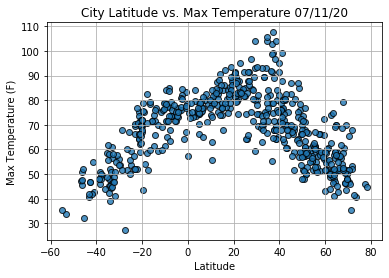

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather Data/Fig1.png")

# Show plot.
plt.show()

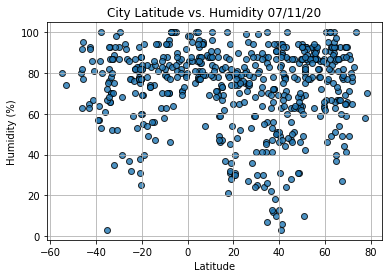

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Weather Data/Fig2.png")
# Show plot.
plt.show()

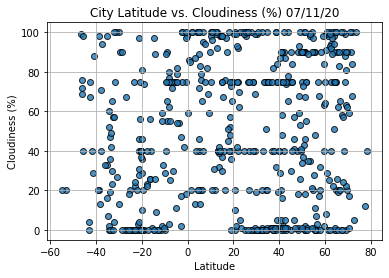

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Weather Data/Fig3.png")
# Show plot.
plt.show()

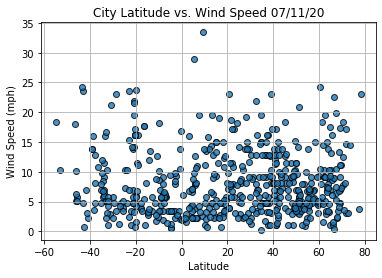

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Weather Data/Fig4.png")
# Show plot.
plt.show()

In [93]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = stats.linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [94]:
index13 = city_data_df.loc[13]
index13

City                         Hilo
Country                        US
Date          2020-07-11 23:47:57
Lat                         19.73
Lng                       -155.09
Max Temp                     82.4
Humidity                       65
Cloudiness                     75
Wind Speed                   8.05
Name: 13, dtype: object

In [95]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4      False
       ...  
548     True
549    False
550     True
551     True
552     True
Name: Lat, Length: 553, dtype: bool

In [96]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Chokurdakh,RU,2020-07-11 23:47:56,70.63,147.92,65.57,49,59,7.83
5,San Carlos Del Zulia,VE,2020-07-11 23:47:56,9.00,-71.91,78.33,88,69,2.62
6,Albany,US,2020-07-11 23:47:34,42.60,-73.97,80.01,78,87,7.02
7,Norman Wells,CA,2020-07-11 23:44:01,65.28,-126.83,59.00,67,90,10.29
9,Bethel,US,2020-07-11 23:47:57,41.37,-73.41,75.99,90,58,1.01


In [97]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

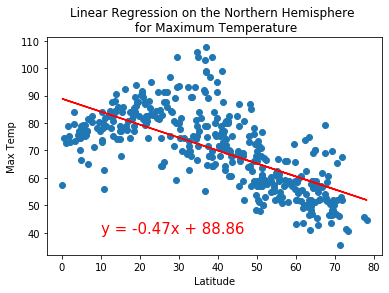

In [98]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

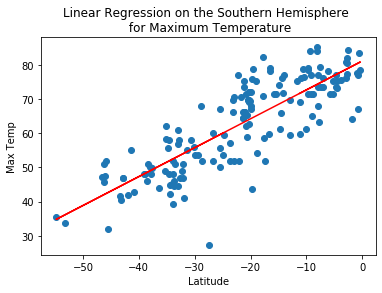

In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

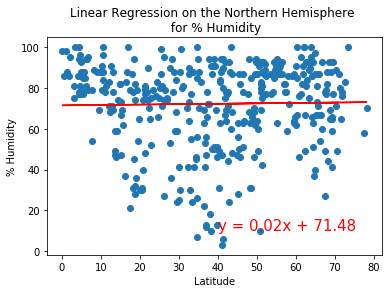

In [100]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

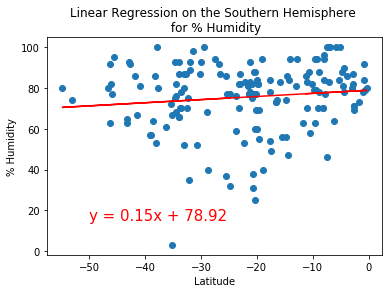

In [102]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

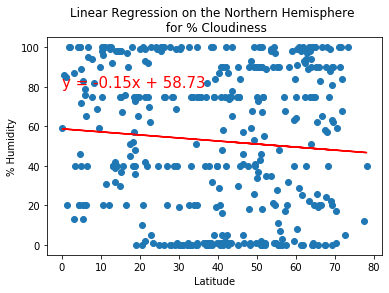

In [110]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Humidity',(0,80))

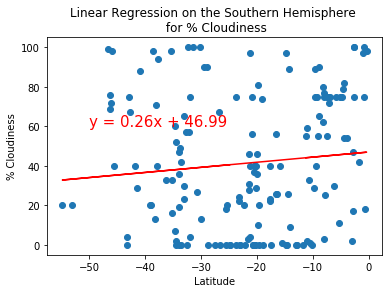

In [105]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

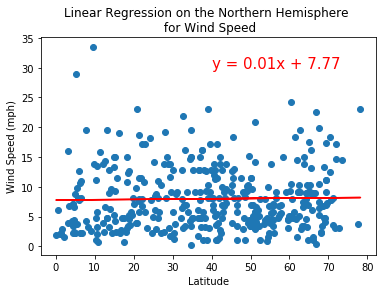

In [112]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(40,30))

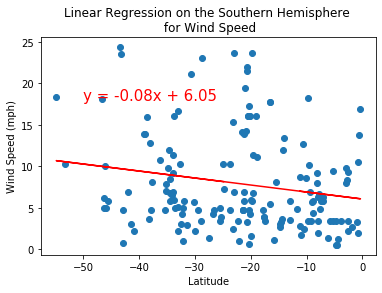

In [118]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-50,18))